Name : Muhammad Erico Ricardo

Link Dashboard : https://public.tableau.com/app/profile/erico.ricardo/viz/PenjualanMobildiIndonesia2021-Jun2024/Dashboard1?publish=yes



Dengan melakukan analisis mendalam terhadap tren preferensi konsumen di berbagai kategori mobil penumpang di Indonesia selama periode 2021-Juni 2024, kami bertujuan untuk meningkatkan penjualan mobil sebesar 50% dan mengurangi stok barang mati di gudang sebesar 30% dalam kurun waktu 12 bulan ke depan.

**visualisasi data :**
Brand apa saja yang mencatat penjualan terbanyak dalam 3,5 tahun terakhir?

Mobil dengan berapa seater yang paling diminati masyarakat dan paling dihindari? 

Engine Categori apa yang paling diminati masyarakat?

Mobil bertipe apa yang paling digemari masyarakat dalam 3 tahun terakhir?

**Statistik Deskriptif**
Lakukan uji korelasi antara merek dengan penjualan, apakah terdapat korelasi antara keduanya?

**Statistik Inferensial**
Lakukan pengujian, apakah terdapat perbedaan signifikan pada penjualan antar transmisi (AT,MT, Manual)?

# Data Loading

In [1]:
import pandas as pd
from scipy import stats
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("Data_Milestone.xlsx")  #membaca data excel
data.head() #menampilkan data teratas

,Engine Category,Brand,Type Model,Engine Capacity,Transmission,FUEL,Seater,Door,CKD/CBU,Origin Country,...,APR,MAY,JUN,JUL,AUG,SEP,OKT,NOV,DES,TOTAL
0,CC < 1.500 [G/D],HONDA,All New City,1.497,CVT,G,5,4,CBU,Thailand,...,-,-,-,-,-,-,-,-,-,30
1,CC < 1.500 [G/D],HONDA,All New Civic,1.5,CVT,G,5,4,CBU,Thailand,...,54,55,56,-,-,-,-,-,-,422
2,CC < 1.500 [G/D],BMW,i7 xDrive60 Limousine RHD AT,-,AT,BEV,4,4,CBU,Germany,...,17,24,11,-,-,-,-,-,-,84
3,CC < 1.500 [G/D],BMW,CBU i4 eDrive35 Gran Coupe AT,-,AT,BEV,5,5,CBU,Germany,...,1,3,-,-,-,-,-,-,-,8
4,CC < 1.500 [G/D],HYUNDAI HMID,Ioniq 6,-,AT,BEV,5,5,CBU,South Korea,...,2,1,6,-,-,-,-,-,-,20


In [2]:
data.info() #data.info dapat digunakan untuk menampilkan daftar informasi dan tipe yang terdapat pada data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Engine Category   2256 non-null   object
 1   Brand             2255 non-null   object
 2   Type Model        2256 non-null   object
 3   Engine Capacity   2256 non-null   object
 4   Transmission      2256 non-null   object
 5   FUEL              2256 non-null   object
 6   Seater            2256 non-null   object
 7   Door              2256 non-null   object
 8   CKD/CBU           2256 non-null   object
 9   Origin Country    2256 non-null   object
 10  YEAR              2256 non-null   int64 
 11  JAN               2256 non-null   object
 12  FEB               2256 non-null   object
 13  MAR               2256 non-null   object
 14  APR               2256 non-null   object
 15  MAY               2255 non-null   object
 16  JUN               2255 non-null   object
 17  JUL           

# Data Cleaning

Pertama, lakukan pemeriksaan apakah ada data missing value dengan isna() terlebih dahulu.
data.isna()

In [3]:
data.isna().sum() #kode data.isna().sum() digunakan untuk menampilkan dan menjumlahkan missing value 'NaN' di setiap kolom.

Engine Category     0
Brand               1
Type Model          0
Engine Capacity     0
Transmission        0
FUEL                0
Seater              0
Door                0
CKD/CBU             0
Origin Country      0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 1
JUN                 1
JUL                 0
AUG                 0
SEP                 0
OKT                 0
NOV                 0
DES                 0
TOTAL               0
dtype: int64

lakukan pengisian 0 pada missing value.

In [4]:
data = data.fillna(0) #fillna digunakan untuk mengganti atau memasukan data missing value tersebut dengan objek yang ingin dimasukan, untuk kode ini adalah 0.

lakukan pemeriksaan pada setiap informasi untuk mengetahui missing value pada masing-masing informasi pada spesifikasi.

## Pembersihan pada informasi Engine Category

In [5]:
data['Engine Category '].unique() #unique digunakan untuk mengetahui macam-macam data yang ada pada kolom Engine Category.

array(['CC < 1.500 [G/D]', 'CC 1.501 - 3.000 [G]\n/ 2.500 [D]',
       'CC > 3.001 [G]\n/ 2.501 [D]', 'CC 1.501 -   2.501 [G/D]',
       'CC ≤ 1.200 [G]', 'CC 1.501 -  2.501 [G/D]',
       'CC 2.501 - 3.000 [G]', 'CC < 1.500\n[G/D]'], dtype=object)

Berdasarkan output diatas, kita dapat melihat beberapa data yang harusnya sama namun memiliki double value dengan tambahan '\n'. Oleh karena itu kita harus satukan kedua value tersebut.

In [6]:
for i in range(len(data)):
    data['Engine Category '] = data['Engine Category '].astype(str) # gunakan astype untuk mengganti tipe data engine category supaya dapat digunakan replace.
    data['Engine Category '] = data['Engine Category '].replace('CC > 3.001 [G]\n/ 2.501 [D]','CC 1.501 - 3.000[G] / 2.500[D]').replace('CC 1.501 - 3.000 [G]\n/ 2.500 [D]','CC 1.501 - 2.501 [G/D]').replace('CC < 1.500\n[G/D]','CC < 1.500 [G/D]')
    #replace digunakan untuk mengganti atau menukar suatu data

In [7]:
data['Engine Category '].unique()

array(['CC < 1.500 [G/D]', 'CC 1.501 - 2.501 [G/D]',
       'CC 1.501 - 3.000[G] / 2.500[D]', 'CC 1.501 -   2.501 [G/D]',
       'CC ≤ 1.200 [G]', 'CC 1.501 -  2.501 [G/D]',
       'CC 2.501 - 3.000 [G]'], dtype=object)

## Pembersihan pada informasi brand

In [8]:
data['Brand'].unique() #unique digunakan untuk mengetahui macam-macam data yang ada pada kolom brand

array(['HONDA', 'BMW', 'HYUNDAI HMID', 'MERCEDES BENZ PC', 'MAZDA',
       'MORRIS GARAGE', 'TOYOTA', 'AUDI', 'LEXUS', 'MERCEDES-BENZ PC',
       'SUBARU', 'CHERY', 'CITROEN', 'DAIHATSU', 'DFSK', 'SERES', 'HAVAL',
       'HYUNDAI - HMID', 'KIA', 'MINI', 'MITSUBISHI MOTORS', 'NISSAN',
       'NETA', 'PEUGEOT', 'SUZUKI', 'VOLKSWAGEN', 'WULING', 'ISUZU', 0,
       'HYUNDAI (HMID)', 'TANK', 'MERCEDES BENZ', 'HYUNDAI - HIM', 'JEEP',
       'HYUNDAI HIM', 'RENAULT', 'VOLKWAGEN'], dtype=object)

Berdasrkan output diatas, terdapat beberapa brand yang dapat diperbaiki seperti:
1. Hyundai - HMID yang memiliki  HYUNDAI HMID dan HYUNDAI (HMID)
2. Hyundai - HIM yang memiliki HYUNDAI HIM
3. MERCEDES BENZ, yang  memiliki MERCEDES BENZ PC dan MERCEDES-BENZ PC

Terdapat missing value at random yang mana seharusnya tidak ada data 0, kemungkinan 0 karena tidak di inputkan.

In [9]:
data['Brand'] = data['Brand'].replace('MERCEDES BENZ PC', 'MERCEDES BENZ').replace('MERCEDES-BENZ PC', 'MERCEDES BENZ').replace('HYUNDAI (HMID)','HYUNDAI - HMID')
data['Brand'] = data['Brand'].replace('HYUNDAI HMID','HYUNDAI - HMID').replace('HYUNDAI HIM','HYUNDAI - HIM')
#lakukan replace penamaan brand 

In [10]:
data.loc[data['Brand']==0] #mengetahui atau melacak data brand yang 0

,Engine Category,Brand,Type Model,Engine Capacity,Transmission,FUEL,Seater,Door,CKD/CBU,Origin Country,...,APR,MAY,JUN,JUL,AUG,SEP,OKT,NOV,DES,TOTAL
433,CC < 1.500 [G/D],0,EV9,-,AT,BEV,5,5,CBU,Korea,...,10,22,7,-,-,-,-,-,-,96


Mobil dengan type model EV9 adalah mobil bermerek KIA, oleh karena itu brand akan disesuaikan yaitu KIA.

In [11]:
data['Brand'].iloc[433] = 'KIA' #menginput data yang 0 dengan kia

C:\Users\muham\AppData\Local\Temp\ipykernel_30568\1456261213.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Brand'].iloc[433] = 'KIA' #menginput data yang 0 dengan kia
C:\Users\muham\AppData\Local\Temp\ipykernel_30568\1456261213.p

## Pembersihan pada informasi kapasitas mesin

In [12]:
print("Nilai untuk pada data kapasitas mesin :", data['Engine Capacity'].unique()) #unique digunakan untuk mengetahui macam-macam data yang ada pada kolom engine capasity

Nilai untuk pada data kapasitas mesin : [1.497 1.5 '-' 1.332 1.496 1.498 1.984 2.995 1.998 2.993 2.998 2 2.494
 1.999 2.488 1.991 2.999 2.996 1.8 1.618 2.5 2.387 2.459 4.969 3.982 1.499
 1.2 1.329 1.298 1.495 998 1.198 1.353 1.49 999 1.199 1.462 1.197 1.4 2.2
 2.499 2.151 2.487 1.595 2.143 2.442 2.477 1.598 1.987 1.798 2.393 3.342
 3.456 3.498 2.694 2.755 2.8 2.498 4.395 3.283 3.828 4.461 1497 1500 1332
 1496 1498 1984 2995 1998 2993 2998 2354 2000 2494 1999 2488 1991 2999
 2996 1800 1798 2500 2459 3445 4969 4395 3982 1499 1329 1298 1495 1200
 1198 1353 1490 1199 1197 1462 1400 2200 2499 2199 2151 2487 1595 2143
 2442 2477 1598 1987 2393 2694 3342 3456 3498 2755 2800 3500 2360 2498
 3604 3283 4461 2900 1556 3000 2387 1618 2148 2100 5663 2979 2980 2982
 2985 4393 0 1248 1000 2400 5000 1997 5461 3828 4700]


berdasarkan output diatas, dapat dilihat bahwa terdapat missing value berbentuk '-' dan perbedaan format angka, ada yang menggunakan liter, misal 2.5 dan ada yang menggunakan cc misal 5000. pada dasarnya perbedaan cc ke liter hanyalah dikalikan 1000, oleh karena itu kita dapat menghilangkan missing value dan menyesuaikan format angka menjadi liter saja.

In [13]:
data.loc[data['Engine Capacity']=='-'] #melacak data dengan engine capasity adalah '-'

,Engine Category,Brand,Type Model,Engine Capacity,Transmission,FUEL,Seater,Door,CKD/CBU,Origin Country,...,APR,MAY,JUN,JUL,AUG,SEP,OKT,NOV,DES,TOTAL
2,CC < 1.500 [G/D],BMW,i7 xDrive60 Limousine RHD AT,-,AT,BEV,4,4,CBU,Germany,...,17,24,11,-,-,-,-,-,-,84
3,CC < 1.500 [G/D],BMW,CBU i4 eDrive35 Gran Coupe AT,-,AT,BEV,5,5,CBU,Germany,...,1,3,-,-,-,-,-,-,-,8
4,CC < 1.500 [G/D],HYUNDAI - HMID,Ioniq 6,-,AT,BEV,5,5,CBU,South Korea,...,2,1,6,-,-,-,-,-,-,20
5,CC < 1.500 [G/D],HYUNDAI - HMID,Genesis G80 EV,-,AT,BEV,5,5,CBU,South Korea,...,-,-,-,-,-,-,-,-,-,-
6,CC < 1.500 [G/D],HYUNDAI - HMID,Genesis G80,-,AT,BEV,5,5,CBU,South Korea,...,1,-,-,-,-,-,-,-,-,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,CC < 1.500 [G/D],HYUNDAI - HMID,Ioniq EV Signature,-,AT,EV,5,5,CBU,South Koreaa,...,32,26,19,11,1,3,-,-,-,201
1685,CC < 1.500 [G/D],HYUNDAI - HIM,IONIQ EV,-,AT,EV,5,4,CBU,Korea,...,-,-,-,-,-,-,-,-,-,-
1903,CC < 1.500 [G/D],NISSAN,Leaf,-,AT,EV,-,-,CBU,Japan,...,-,-,-,3,15,2,6,8,8,42
2031,CC 1.501 - 2.501 [G/D],HYUNDAI - HMID,Kona EV,-,AT,EV,5,5,CBU,South Koreaa,...,61,30,34,24,15,27,34,8,3,360


kita dapat melihat beberap data yang memiliki nilai '-' yang mana merupakan missing value, namun pada kasus diatas tepatnya pada engine capacity yang bernilai '-' merupakan mising value bertipe Missing At Random (MAR), yang mana missing value tersebut terkait dengan variabel lain yaitu pada fuel dapat dilihat bahwa data mobil tersebut merupakan mobil BEV (battery electric vehicle) dan EV (electric vehicle) yang mana mobil listrik memang tidak memiliki kapasitas mesin. jadi kita bisa inputkan bahwa kapasitas mesinnya adalah 0.

In [14]:
for i in range(len(data)): #melakukan perulangan sebanyak data untuk:
  data['Engine Capacity'] = data['Engine Capacity'].astype(str)
  data['Engine Capacity'] = data['Engine Capacity'].replace('-',0) #menukar '-' dengan 0
  data['Engine Capacity'] = pd.to_numeric(data['Engine Capacity']) #mengubah tipe data
  data['Engine Capacity'] = data['Engine Capacity'].where(data['Engine Capacity'] < 1000, data['Engine Capacity'] / 1000) #mengubah format penulisan cc


In [15]:
print("Nilai untuk pada data kapasitas mesin :", data['Engine Capacity'].unique())

Nilai untuk pada data kapasitas mesin : [  1.497   1.5     0.      1.332   1.496   1.498   1.984   2.995   1.998
   2.993   2.998   2.      2.494   1.999   2.488   1.991   2.999   2.996
   1.8     1.618   2.5     2.387   2.459   4.969   3.982   1.499   1.2
   1.329   1.298   1.495 998.      1.198   1.353   1.49  999.      1.199
   1.462   1.197   1.4     2.2     2.499   2.151   2.487   1.595   2.143
   2.442   2.477   1.598   1.987   1.798   2.393   3.342   3.456   3.498
   2.694   2.755   2.8     2.498   4.395   3.283   3.828   4.461   2.354
   3.445   2.199   3.5     2.36    3.604   2.9     1.556   3.      2.148
   2.1     5.663   2.979   2.98    2.982   2.985   4.393   1.248   1.
   2.4     5.      1.997   5.461   4.7  ]


## Pembersihan pada informasi Transmission

In [16]:
print("Data jenis transmisi :", data['Transmission'].unique()) #mengetahui isi data transmission.

Data jenis transmisi : ['CVT' 'AT' 'MT' '-' 'A/T' 0]


Berdasarkan hasil diatas, terdapat beberapa jenis transmisi yaitu CVT, AT, MT, dan A/T yang pada dasarnya sama dengan AT. Selain itu terdapat missing value yaitu '0' dan '-' yang merupakan missing at random (MAR) yang kemungkinan karena tidak diinputkan, oleh karena itu kita harus menyamakan penulisan AT dan A/T dan menghandling missing valuenya.

In [17]:
data.loc[data['Transmission'] == '-'] #memeriksa data transmisi adalah '-'

,Engine Category,Brand,Type Model,Engine Capacity,Transmission,FUEL,Seater,Door,CKD/CBU,Origin Country,...,APR,MAY,JUN,JUL,AUG,SEP,OKT,NOV,DES,TOTAL
35,CC 1.501 - 2.501 [G/D],BMW,530e,0.000,-,PHEV,-,-,-,Germany,...,1,-,-,-,-,-,-,-,-,1
63,CC 1.501 - 2.501 [G/D],MERCEDES BENZ,AMG CLA 45 S Shooting Brake (X118),1.998,-,-,-,4,CBU,-,...,-,-,-,-,-,-,-,-,-,-
81,CC 1.501 - 3.000[G] / 2.500[D],MERCEDES BENZ,Maybach S 580 (Z223)*,3.982,-,-,-,-,CBU,-,...,-,-,1,-,-,-,-,-,-,1
136,CC < 1.500 [G/D],SERES,E502 EV (4X2) A/T,0.000,-,BEV,4,-,CKD,Indonesia,...,5,16,14,-,-,-,-,-,-,72
137,CC < 1.500 [G/D],SERES,E502 EV B (4X2) A/T,0.000,-,BEV,4,-,CKD,Indonesia,...,-,-,-,-,-,-,-,-,-,2
231,CC < 1.500 [G/D],MITSUBISHI MOTORS,L100 EV,0.000,-,BEV,2,3,CKD,Indonesia,...,1,-,-,-,-,-,-,-,-,6
374,CC 1.501 - 2.501 [G/D],MERCEDES BENZ,AMG A 45 4MATIC (W177)*,2.000,-,G,-,-,CBU,-,...,-,-,1,-,-,-,-,-,-,1
476,CC 1.501 - 2.501 [G/D],MINI,Countryman S ALL4 A/T,0.000,-,-,-,-,-,UK,...,-,-,1,-,-,-,-,-,-,1
545,CC 1.501 - 2.501 [G/D],BMW,218i Gran Coupe,0.000,-,-,-,-,-,-,...,6,24,39,6,4,23,27,20,9,194
593,CC 1.501 - 2.501 [G/D],MERCEDES BENZ,AMG CLA 45 S Shooting Brake (X118),1.998,-,-,-,4,CBU,-,...,-,-,-,-,-,-,-,-,-,1


In [18]:
data.loc[data['Transmission'] == '0'] #memeriksa data transmisi adalah 0

,Engine Category,Brand,Type Model,Engine Capacity,Transmission,FUEL,Seater,Door,CKD/CBU,Origin Country,...,APR,MAY,JUN,JUL,AUG,SEP,OKT,NOV,DES,TOTAL


Berdasarkan output diatas, kita dapat mengetahui bahwa data yang memiliki missing value pada transmission adalah mobil yang memiliki transmisi AT, dapat dilihat pada mini countryman A/T, dan beberapa mobil diatas seperti mercedes benz, BMW, dan Mini tidak menjual mobil bertansmisi manual lagi di indonesia dan mereka tidak memiliki transmisi CVT.

informasi dari bing "
Benar, untuk saat ini, Mercedes-Benz, BMW, dan Mini tidak menjual mobil dengan transmisi manual di Indonesia. Selain itu, mereka juga tidak memiliki produk dengan transmisi CVT yang dijual di sini¹. Jadi, jika Anda mencari mobil dari merek-merek tersebut, Anda akan menemukan transmisi otomatis lainnya seperti transmisi otomatis konvensional atau transmisi ganda (dual-clutch automatic). Semoga informasi ini membantu! 😊

Source: Conversation with Copilot, 7/31/2024
(1) Which Cars Have CVTs for 2022? | Cars.com. https://www.cars.com/articles/which-cars-have-cvts-for-2022-458774/.
(2) List Of Cars Without CVTs - Car City Wholesale. https://www.carcitywholesale.com/blogs/list-of-cars-without-cvts.htm.
(3) Which Cars Have CVTs? - J.D. Power and Associates. https://www.jdpower.com/cars/shopping-guides/which-cars-have-cvts.
(4) Which Cars Have CVTs? | Cars.com. https://www.cars.com/articles/which-cars-have-cvts-432407/."

In [19]:
for i in range(len(data)): #melakukan perulangan untuk mengubah data dan memperbaiki data
  data['Transmission'] = data['Transmission'].astype(str) 
  data['Transmission'] = data['Transmission'].replace('-','AT').replace('A/T','AT').replace('0','AT')


## Pembersihan pada informasi fuel

In [20]:
print("Nilai untuk pada data bahan bakar :", data['FUEL'].unique()) #mengetahui isi data FUEL

Nilai untuk pada data bahan bakar : ['G' 'BEV' 'PHEV' 'HYBRID' '-' 'EV' 'D' 'HYBRI' 'HEV' 0]


Kita dapat mengetahui dari output tersebut terdapat beberapa jenis fuel yaitu :
1. "G" adalah Gasoline atau bensin.
2. "BEV" adalah battery electric vehicle (mobil listrik).
3. "PHEV" adalah Plug in Hybrid Electric Vehicle (Mobil hybrid yang dapat di charge di SPKLU).
4. "Hybrid" adalah Mobil hybrid normal.
5. "EV" adalah Electric Vehicle (Mobil Listrik) sama seperti BEV oleh karena itu nanti dapat kira satukan dengan BEV.
6. "D" adalah Diesel.
7. 'Hybri" adalah typo dari hybrid.
8. "HEV" adalah Hybrid Electric Vehicle (pada dasarnya sama dengan hybrid biasa).
berdasarkan informasi diatas kita dapat kelompokan menjadi 4 jenis bahan bakar utama:
1. Gasoline 
2. BEV
3. Diesel
4. Hybrid

selain itu didapatkan juga data missing pada '-' dan '0' yang merupakan missing at random karena mungkin tidak dimasukan atau terjadi kesalahan pada data.

In [21]:
data.loc[data['FUEL']==0] #memeriksa data dengan fuel adalah 0

,Engine Category,Brand,Type Model,Engine Capacity,Transmission,FUEL,Seater,Door,CKD/CBU,Origin Country,...,APR,MAY,JUN,JUL,AUG,SEP,OKT,NOV,DES,TOTAL
2198,CC 1.501 - 2.501 [G/D],BMW,X7 CKD,2.998,AT,0,0,0,CKD,Indonesia,...,13,19,-,-,-,1,1,11,16,74


Setelah kita mengetahui data apa yang memiliki FUEL = 0, maka kita dapat mensubtitusikan 0 dengan Gasoline, karena mesin BMW X7 CKD adalah mesin 3000cc Bensin.

In [22]:
data.loc[data['FUEL']=='-'] #memeriksa data dengan fuel adalah '-'

,Engine Category,Brand,Type Model,Engine Capacity,Transmission,FUEL,Seater,Door,CKD/CBU,Origin Country,...,APR,MAY,JUN,JUL,AUG,SEP,OKT,NOV,DES,TOTAL
63,CC 1.501 - 2.501 [G/D],MERCEDES BENZ,AMG CLA 45 S Shooting Brake (X118),1.998,AT,-,-,4,CBU,-,...,-,-,-,-,-,-,-,-,-,-
81,CC 1.501 - 3.000[G] / 2.500[D],MERCEDES BENZ,Maybach S 580 (Z223)*,3.982,AT,-,-,-,CBU,-,...,-,-,1,-,-,-,-,-,-,1
476,CC 1.501 - 2.501 [G/D],MINI,Countryman S ALL4 A/T,0.000,AT,-,-,-,-,UK,...,-,-,1,-,-,-,-,-,-,1
545,CC 1.501 - 2.501 [G/D],BMW,218i Gran Coupe,0.000,AT,-,-,-,-,-,...,6,24,39,6,4,23,27,20,9,194
593,CC 1.501 - 2.501 [G/D],MERCEDES BENZ,AMG CLA 45 S Shooting Brake (X118),1.998,AT,-,-,4,CBU,-,...,-,-,-,-,-,-,-,-,-,1
615,CC 1.501 - 3.000[G] / 2.500[D],MERCEDES BENZ,GT 53 4MATIC+ (X290)*,3.982,AT,-,-,-,CBU,-,...,1,3,1,-,-,-,1,-,-,6
616,CC 1.501 - 3.000[G] / 2.500[D],MERCEDES BENZ,Maybach S 580 (Z223)*,3.982,AT,-,-,-,CBU,-,...,-,2,2,-,1,1,3,-,-,11
940,CC 1.501 - 2.501 [G/D],LEXUS,NX 450h+,0.000,AT,-,-,4,CBU,Japan,...,-,-,-,-,-,-,-,-,-,-
1157,CC 1.501 - 2.501 [G/D],BMW,218i Gran Coupe,0.000,AT,-,-,-,-,-,...,-,-,43,30,38,32,24,45,5,264
1203,CC 1.501 - 2.501 [G/D],MERCEDES BENZ,AMG CLA 45 S Shooting Brake (X118),1.998,AT,-,-,4,CBU,-,...,-,-,7,-,1,-,-,1,-,9


Berdasarkan data mobil yang memiliki fuel = '-' terdapat 15 kendaraan yang mana 14 merupakan bensin dan 1 merupakan hybrid yaitu lexus NX450h+, oleh karena itu kita akan perbaiki dan memasukan data sesuai dengan kendaraannya.

In [23]:
data['FUEL'].iloc[940] = "Hybrid" #memasukan data 

C:\Users\muham\AppData\Local\Temp\ipykernel_30568\9150020.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['FUEL'].iloc[940] = "Hybrid" #memasukan data
C:\Users\muham\AppData\Local\Temp\ipykernel_30568\9150020.py:1: SettingWithCopyWa

In [24]:
for i in range(len(data)): #melakukan perulangan untuk:
  data['FUEL'] = data['FUEL'].astype(str) #mengubah tipe data dan memperbaiki data
  data['FUEL'] = data['FUEL'].replace('G','Gasoline').replace('D','Diesel').replace('EV','BEV').replace('0','Gasoline').replace('HYBRI',"Hybrid").replace('HEV','Hybrid').replace('PHEV','Hybrid').replace('-','Gasoline').replace('HYBRID','Hybrid')

## Pembersihan pada informasi seater

In [25]:
print("Nilai untuk pada data Seater :", data['Seater'].unique()) #mengetahui isi data seater.

Nilai untuk pada data Seater : [5 4 2 '-' 7 8 9 6 11 3 16 0 1 14 15 20 21 22 34 37 24 10]


Berdasarkan informasi seater diatas kita dapat mengetahui missing value pada '-' dan 0 karena tidak mungkin mobil tanpa seater. Missing value at random yang mana seharusnya tidak ada data 0, kemungkinan 0 karena tidak di inputkan.

In [26]:
model = data['Type Model'].loc[data['Seater']=='-'] #melakukan pemeriksaan type model dengan seater '0'.
model.to_csv('cekseater.csv') #memindahkan ke csv supaya dapat saya lakukan pemeriksaan.

In [27]:
data['Type Model'].loc[data['Seater']==0] #melakukan pemeriksaan type model dengan seater '0'.

1701                       M2 Coupe A/T
1702                 M2 Competition A/T
1703                          M2 CS A/T
1704        M235i xDrive Gran Coupe A/T
1705                       320i CKD A/T
1706                       330i CKD A/T
1707                           330i A/T
1708                        330e Msport
1709                   320i Touring A/T
1723                   Z4 sDrive30i A/T
1724                     840i Coupe A/T
1725                840i Gran Coupe A/T
1768               X1 sDrive18i F48 A/T
1769                   X2 sDrive18i A/T
1770                            i3s A/T
1829                         New CR-V T
1830                  New CR-V Prestige
1838                         CITY HB RS
1839                         CITY HB RS
1872      Cooper Countryman F60 CKD A/T
2011           X3 sDrive20i G01 CKD A/T
2012           X3 xDrive20i G01 CKD A/T
2013           X3 sDrive20i G01 CKD A/T
2014                       X3 xDrive30e
2017                           New CR-V


Saya melakukan pemeriksaan dan menentukan seater mobil yang saya bagi menjadi 2, 4, 5, dan 7 seater.
saya dapatkan 7 seater pada mobil dengan model "Confero,Cortez,Formo,Almaz,Palisade, CR-V,Seprinter, V Klass, X5, X7,Terra,LivIndonesia,Tiguan, VITO, V 220, Santa Fe, H-1"

Mobil 4 Seater dengan model "Century, Air EV, S 450, Maybach, 840i, 730Li ,740Li, Coupe, LS 500, M8, M850, GT, M2, i3s "

Mobil 2 Seater "C+POD, Z4, COMS"

dan sisanya adalah mobil 5 seater

In [28]:
#mengelompokan data missing value berdasarkan jumlah seaternya.
seater7 = ["Confero","Cortez","Formo","Almaz","Palisade", "CR-V","Seprinter", "V Klass", "X5", "X7","Terra","LivIndonesia","Tiguan", "VITO", "V 220", "Santa Fe", "H-1"]
seater4 = ['Century', 'Air EV', 'S 450', 'Maybach', '840i', '730Li' ,'740Li', 'Coupe', 'LS 500', 'M8', 'M850', 'GT', 'M2', 'i3s' ]
seater2 = ['C+POD','Z4','COMS',]

In [29]:
cek7 = data.loc[data['Type Model'].str.contains('|'.join(seater7))] #melakukan pemeriksaaan apabila tipe modelnya memiliki karakter salah satu dari kelomok pada missing value.
cek4 = data.loc[data['Type Model'].str.contains('|'.join(seater4))]
cek2 = data.loc[data['Type Model'].str.contains('|'.join(seater2))]

data.loc[cek7.index, 'Seater'] = 7 #memasukan data sesuai index
data.loc[cek4.index, 'Seater'] = 4
data.loc[cek2.index, 'Seater'] = 2

data['Seater'] = data['Seater'].replace('-',5).replace(0,5) #melakukan penukaran sisa data yang diluar pengelompokan.


C:\Users\muham\AppData\Local\Temp\ipykernel_30568\770902785.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Seater'] = data['Seater'].replace('-',5).replace(0,5) #melakukan penukaran sisa data yang diluar pengelompokan.


In [30]:
data.loc[data['Seater']==1] #mengetahui mobil apa yang hanya memiliki 1 kursi

,Engine Category,Brand,Type Model,Engine Capacity,Transmission,FUEL,Seater,Door,CKD/CBU,Origin Country,...,APR,MAY,JUN,JUL,AUG,SEP,OKT,NOV,DES,TOTAL
1710,CC 1.501 - 2.501 [G/D],BMW,M3 A/T,2.98,AT,Gasoline,1,0,CBU,Germany,...,-,-,2,5,2,1,5,3,-,18


BMW M3 Seharusnya memiliki 4 seater, bukan 1 oleh karena itu harus diperbaiki.

In [31]:
data['Seater'].iloc[1710] = 4 #memperbaiki data mobil yang memiliki 1 kursi.

C:\Users\muham\AppData\Local\Temp\ipykernel_30568\677648700.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Seater'].iloc[1710] = 4 #memperbaiki data mobil yang memiliki 1 kursi.
C:\Users\muham\AppData\Local\Temp\ipykernel_30568\67

## Pembersihan pada informasi door

In [32]:
data['Door'].unique() #mengetahui isi data door

array([4, 5, 2, '-', 3, 0], dtype=object)

dapat dilihat dari output terdapat missing value pada '-' dan 0 yang mana merupakan missing at random karena tidak diinputkan.

In [33]:
data.loc[data['Door']==0] #melakukan pemeriksaan pada data door adalah 0

,Engine Category,Brand,Type Model,Engine Capacity,Transmission,FUEL,Seater,Door,CKD/CBU,Origin Country,...,APR,MAY,JUN,JUL,AUG,SEP,OKT,NOV,DES,TOTAL
1701,CC 1.501 - 2.501 [G/D],BMW,M2 Coupe A/T,2.979,AT,Gasoline,4,0,CBU,Germany,...,-,-,-,-,-,-,-,-,-,-
1702,CC 1.501 - 2.501 [G/D],BMW,M2 Competition A/T,2.979,AT,Gasoline,4,0,CBU,Germany,...,5,4,4,19,-,-,-,-,-,39
1703,CC 1.501 - 2.501 [G/D],BMW,M2 CS A/T,2.979,AT,Gasoline,4,0,CBU,Germany,...,-,-,-,-,-,-,-,-,-,4
1704,CC 1.501 - 2.501 [G/D],BMW,M235i xDrive Gran Coupe A/T,1.998,AT,Gasoline,4,0,CBU,Germany,...,1,-,-,-,1,-,-,-,1,7
1705,CC 1.501 - 2.501 [G/D],BMW,320i CKD A/T,1.998,AT,Gasoline,5,0,CKD,Indonesia,...,1,-,1,2,-,-,110,41,39,315
1706,CC 1.501 - 2.501 [G/D],BMW,330i CKD A/T,1.998,AT,Gasoline,5,0,CKD,Indonesia,...,20,21,24,2,2,-,32,25,18,194
1707,CC 1.501 - 2.501 [G/D],BMW,330i A/T,1.998,AT,Gasoline,5,0,CBU,Germany,...,-,-,-,-,-,-,-,-,-,-
1708,CC 1.501 - 2.501 [G/D],BMW,330e Msport,1.998,MT,Gasoline,5,0,CBU,Germany,...,-,-,-,-,-,-,1,-,-,1
1709,CC 1.501 - 2.501 [G/D],BMW,320i Touring A/T,1.998,AT,Gasoline,5,0,CBU,Germany,...,-,-,-,-,30,2,-,1,-,33
1710,CC 1.501 - 2.501 [G/D],BMW,M3 A/T,2.980,AT,Gasoline,4,0,CBU,Germany,...,-,-,2,5,2,1,5,3,-,18


Berdasarkan output diatas kita dapat melakukan pemeriksaan yang mana terdapat 2 door yaitu 2 door dan 4 door yang mana:
2 door dimiliki oleh "M2, M4, 430i,840i Coupe"
dan sisanya adalah 4 door.

In [34]:
cekdoor = data['Type Model'].loc[data['Door']=='-'] #melakukan pemeriksaan pada data door adalah'-'
cekdoor.to_csv("cekdoor.csv") #melakukan pemindahan ke csv hasil pemeriksaan supaya lebih mudah dilihat

Berdasarkan pemeriksaan cekdoor saya sudah menentukan mana yang 2 door , 3 door,dan mana yang 4 door. yaitu :
2 door : z4, Cooper S Convertible, John Cooper Works Convertible, E 200 Coupe, LS 500, M8, M850, GT  53, E502, 220i, C 43 Coupe, Cooper Convertible

3 door : Cooper Hatch, Cooper S Hatch, Cooper SE, Rubicon 2door,i3s

dan sisanya dalah 4 door.

In [35]:
#melakukan pengelompokan data yang memiliki missing value pada door.
door2 = ['z4', 'Cooper S Convertible', 'John Cooper Works Convertible', 'E 200 Coupe', 'LS 500', 'M8', 'M850', 'GT  53, E502', '220i', 'C 43 Coupe', 'Cooper' 'Convertible','M2', 'M4', '430i','840i Coupe']
door3 = ['Cooper Hatch', 'Cooper S Hatch', 'Cooper SE', 'Rubicon 2door','i3s']

In [36]:
cek2 = data.loc[data['Type Model'].str.contains('|'.join(door2))] #melakukan pemeriksaan pada type model apabila memiliki kata yang sama pada kelompok missing value
cek3 = data.loc[data['Type Model'].str.contains('|'.join(door3))]

data.loc[cek3.index, 'Door'] = 3 #memasukan data ke missing value
data.loc[cek2.index, 'Door'] = 2

data['Door'] = data['Door'].replace('-',4).replace(0,4) #memasukan data ke missing value diluar yang dikelompokan.

C:\Users\muham\AppData\Local\Temp\ipykernel_30568\3989257698.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Door'] = data['Door'].replace('-',4).replace(0,4) #memasukan data ke missing value diluar yang dikelompokan.


## Pembersihan Informasi CKD/CBU

In [37]:
data['CKD/CBU'].unique() #mengetahui isi data CKD/CBU

array(['CBU', 'CKD', '-'], dtype=object)

Dapat dilihat bahwa terdapat missing value '-' yang mana merupakan missing at random karena tidak diinputkan.

In [38]:
data['Type Model'].loc[data['CKD/CBU']=='-'] #Memeriksa data yang CKD/CBU adalah '-'

35                         530e
40       735i Limousine RHD A/T
41        735i Limousine RHD AT
476       Countryman S ALL4 A/T
490            iX1 eDrive20 A/T
545            218i  Gran Coupe
563     735i  Limousine RHD A/T
564      735i  Limousine RHD AT
1157            218i Gran Coupe
Name: Type Model, dtype: object

Berdasarkan output diatas, kita dapat mengetahui mobil apa saja yang masih belum diketahui CKD/CBU-nya.
CKD dan CBU adalah sebutan tipe-tipe mobil berdasarkan rakitannya. CKD merupakan singkatan dari Completely Knock Down, sedangkan CBU untuk kendaraan Completely Built Up. CKD mobil merupakan salah satu istilah pada mobil yang diimpor langsung dengan keadaan komponen lengkap namun belum dirakit.
Berdasarkan output diatas, kebanyakan dari output diatas adalah ckd kecuali Countryman yang CBU German.

In [39]:
data['CKD/CBU'].iloc[476] = 'CBU' #memasukan data
data['CKD/CBU'] = data['CKD/CBU'].replace('-','CKD') #mengganti missing value dengan data yang sesuai.

C:\Users\muham\AppData\Local\Temp\ipykernel_30568\3331430930.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['CKD/CBU'].iloc[476] = 'CBU' #memasukan data
C:\Users\muham\AppData\Local\Temp\ipykernel_30568\3331430930.py:1: SettingWith

## Pembersihan informasi Origin Country

In [40]:
data['Origin Country'].unique() #mengetahui isi data origin country

array(['Thailand', 'Germany', 'South Korea', '-', 'Indonesia', 'UK',
       'Japan', 'India', 'Malaysia', 'ChIndonesia', 'Korea', 'Spain',
       'USA', 'JAPAN', 'JPN', 'South Koreaa', 'IND', 'Perancis'],
      dtype=object)

In [41]:
data.loc[data['Origin Country']=="ChIndonesia"] #mengetahui apa maksud dari data origin country 'ChIndonesia'

,Engine Category,Brand,Type Model,Engine Capacity,Transmission,FUEL,Seater,Door,CKD/CBU,Origin Country,...,APR,MAY,JUN,JUL,AUG,SEP,OKT,NOV,DES,TOTAL
134,CC < 1.500 [G/D],DFSK,GELORA EC35 BLIND VAN (4X2) A/T,1.498,AT,BEV,7,4,CBU,ChIndonesia,...,2,-,25,-,-,-,-,-,-,40
135,CC < 1.500 [G/D],DFSK,GELORA EC36 MINI BUS 1.5 (4X2) A/T,0.000,AT,BEV,7,4,CBU,ChIndonesia,...,3,-,1,-,-,-,-,-,-,23
204,CC < 1.500 [G/D],MORRIS GARAGE,4 EV Ignite,0.000,AT,BEV,5,5,CBU,ChIndonesia,...,-,-,-,-,-,-,-,-,-,-
205,CC < 1.500 [G/D],MORRIS GARAGE,4 EV Magnify,0.000,AT,BEV,5,5,CBU,ChIndonesia,...,-,-,-,-,-,-,-,-,-,39
238,CC < 1.500 [G/D],NETA,NETA V EV,0.000,AT,BEV,5,5,CBU,ChIndonesia,...,-,-,-,-,-,-,-,-,-,69
673,CC < 1.500 [G/D],DFSK,GELORA EC35 BLIND VAN (4X2) A/T,1.498,AT,BEV,7,4,CBU,ChIndonesia,...,8,2,1,10,4,3,-,23,8,67
674,CC < 1.500 [G/D],DFSK,GELORA EC36 MINI BUS 1.5 (4X2) A/T,0.000,AT,BEV,7,4,CBU,ChIndonesia,...,5,7,2,11,13,9,1,11,5,82
756,CC < 1.500 [G/D],MORRIS GARAGE,ZS EV,0.000,AT,BEV,5,5,CBU,ChIndonesia,...,-,-,-,-,-,-,-,-,-,2
763,CC < 1.500 [G/D],MORRIS GARAGE,4 EV Ignite,0.000,AT,BEV,5,5,CBU,ChIndonesia,...,-,-,-,8,5,3,1,10,-,27
764,CC < 1.500 [G/D],MORRIS GARAGE,4 EV Ignite,0.000,AT,BEV,5,5,CBU,ChIndonesia,...,-,-,-,28,11,22,3,7,1,72


Berdasarkan 2 output diatas, kita mengetahui terdapat missing value pada '-' selanjutnya kita dapat mengganti 'JPN' dengan 'Jepang' dan 'IND' dengan 'Indonesia' supaya menjadi 1 kategori saja.
selain itu terdapat data 'ChIndonesia' yang setelah kita lakukan pemeriksaan pada datanya, ternyata merupakan kendaraan CBU import dari china oleh karena itu 'ChIndonesia' akan kita ubah ke 'China'

In [42]:
#melakukan penyelarasan data nama country
data['Origin Country'] = data['Origin Country'].replace('JPN','Japan').replace('JAPAN','Japan').replace('IND', "Indonesia").replace('ChIndonesia', 'China').replace('Perancis', 'France').replace('FRANCE','France')

In [43]:
cekorigin = data[[('Type Model'),('Brand')]].loc[data['Origin Country']=='-'] #melakukan pemeriksaan pada data origin yang '-'
cekorigin.to_csv('cek_origin.csv') #memindahkan data origin ke csv supaya mudah diperiksa.

Kita dapat memeriksa origin pembuatannya menggunakan CKD atau CBUnya, apabila CKD maka origin country-nya adalah indonesia dan apabila CBU maka origin countrynya adalah asal merek tersebut, seperti :

Mercedes-benz dan Mercedes-benz PC dari Germany

Renault dari France

Toyota, Honda dari Japan

Hyundai - HMID (Hyndai motor India) dari India

dan dari pengecekan itu juga saya menemukan beberapa produk mercedes-benz yang memiliki nama brand yang salah yaitu ISUZU, oleh karena itu nanti juga dilakukan perbaikan dan penyatuan merek Mercedes Benz

In [44]:
data.loc[(data['Origin Country'] == '-') & (data['CKD/CBU']=='CKD'),'Origin Country'] = 'Indonesia' #mengganti missing value dengan data
data['Brand'] = data['Brand'].replace('MERCEDES BENZ PC', 'MERCEDES BENZ').replace('MERCEDES-BENZ PC', 'MERCEDES BENZ') #menyatukan data
data['Brand'].iloc[2203:2210] = "MERCEDES BENZ" #memasukan data

C:\Users\muham\AppData\Local\Temp\ipykernel_30568\1688840543.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Brand'].iloc[2203:2210] = "MERCEDES BENZ" #memasukan data
C:\Users\muham\AppData\Local\Temp\ipykernel_30568\1688840543.py:

In [45]:
data.loc[(data['Brand'] == 'MERCEDES BENZ') & (data['CKD/CBU'] != 'CKD'), 'Origin Country'] = "Germany" #melakukan perbaikan pda data
data.loc[(data['Brand'] == 'RENAULT') & (data['CKD/CBU'] == 'CBU'), 'Origin Country'] = "FRANCE"
data.loc[((data['Brand'] == 'HONDA') | (data['Brand'] == 'TOYOTA')) & (data['CKD/CBU'] == 'CBU'), 'Origin Country'] = "Indonesia"
data.loc[(data['Brand'] == 'HYUNDAI - HMID') & (data['CKD/CBU'] == 'CBU'), 'Origin Country'] = "India"
data.loc[(data['Origin Country']=='FRANCE')] == "France"
data.loc[(data['Origin Country']=='UK')] == "United Kingdom"
data.loc[(data['Origin Country']=='USA')] == "Untited States of America"

,Engine Category,Brand,Type Model,Engine Capacity,Transmission,FUEL,Seater,Door,CKD/CBU,Origin Country,...,APR,MAY,JUN,JUL,AUG,SEP,OKT,NOV,DES,TOTAL
447,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
448,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
449,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
450,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
489,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1036,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1043,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
data['Origin Country'].unique()

array(['Indonesia', 'Germany', 'India', 'Thailand', 'Japan', 'Malaysia',
       'China', 'UK', 'Korea', 'USA', 'FRANCE', 'France'], dtype=object)

Perbaiki FRANCE, UK, dan USA

In [47]:
for index, row in data.iterrows():
    if row['Origin Country'] == 'FRANCE':
        data.loc[index, 'Origin Country'] = 'France'
    elif row['Origin Country'] == 'UK':
        data.loc[index, 'Origin Country'] = 'United Kingdom'
    elif row['Origin Country'] == 'USA':
        data.loc[index, 'Origin Country'] = 'United States of America'

## Pembersihan informasi data penjualan

Pada data penjualan terdapat data penjualan perbulan dan TOTAL penjualan dalam tahun, dapat kita lakukan pembersihan karena terdapat '-' yang pada merupakan karakter yang menandakan tidak ada penjualan, oleh karena itu dapat kita ubah ke 0

In [48]:
Sale = data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP','OKT', 'NOV', 'DES', 'TOTAL']] #menyatukan beberapa kolom menjadi dataframe baru yang merupakan data penjualan.

In [49]:
for a in Sale.columns: #melakukan perulangan untuk:
  for i in range(len(data)):
    data[a] = data[a].astype(str).str.replace('.', '', regex=False).replace('-', 0).replace('NaN', 0) #membersihkan data
  data[a] = data[a].astype(int) #mengubah tipe data


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine Category   2256 non-null   object 
 1   Brand             2256 non-null   object 
 2   Type Model        2256 non-null   object 
 3   Engine Capacity   2256 non-null   float64
 4   Transmission      2256 non-null   object 
 5   FUEL              2256 non-null   object 
 6   Seater            2256 non-null   int64  
 7   Door              2256 non-null   int64  
 8   CKD/CBU           2256 non-null   object 
 9   Origin Country    2256 non-null   object 
 10  YEAR              2256 non-null   int64  
 11  JAN               2256 non-null   int32  
 12  FEB               2256 non-null   int32  
 13  MAR               2256 non-null   int32  
 14  APR               2256 non-null   int32  
 15  MAY               2256 non-null   int32  
 16  JUN               2256 non-null   int32  


In [51]:
data.to_csv('data_clean.csv', index=False) #memindah data bersih ke csv untuk tableu

In [52]:
print("Skewness :", data['TOTAL'].skew()) #memeriksa skewness data total
print("Kurtosis :", data['TOTAL'].kurtosis()) #memeriksa kurtosis data total

Skewness : 5.123175865463382
Kurtosis : 34.90059476679755


Dapat dilihat bahwa data sangat skew, oleh karena itu kita dapat menggunakan tukeys-rule untuk memperbaiki data tidak normal

In [53]:
##because the data is not normally distributed, we can use Tukey's Rule
Q1 = data['TOTAL'].quantile(0.25) #initialize Q1 using quantile
Q3 = data['TOTAL'].quantile(0.75) #initialize Q3 using quantile
IQR = Q3-Q1 #initialize IQR

up_bound = Q3 + 1.5*IQR #initialize up_bound with the formula
low_bound = Q1 - 1.5*IQR #initialize Low_bound with the formula


print(f'Upper Boundary: {up_bound}' ) #print upper boundary
print(f'Lower Boundary: {low_bound}') #print lower boundary

Upper Boundary: 1788.625
Lower Boundary: -1060.375


In [54]:
outlier = data[(data['TOTAL']<low_bound) | (data['TOTAL']>up_bound)] #initialize outlier from data and condition of outlier
total_no_outlier = data[(data['TOTAL']>=low_bound) & (data['TOTAL']<=up_bound)]  #initialize non-outlier from data and condition of non-outlier
jumlah_outlier = outlier['TOTAL'].count()  #initialize number of outlier
print(f'Percentage of outliers: {jumlah_outlier *100/len(data)}%%')  #initialize precentage of outlier

Percentage of outliers: 14.317375886524824%%


Sekarang data sudah tidak memiliki outlier. dengan nama variabel total_no_outlier.

# Analisis dan perhitungan

### Brand yang mencatat penjualan tertinggi dalam 3.5 tahun terakhir.

In [55]:

sales_by_brand = data.groupby('Brand')['TOTAL'].sum().reset_index() #kode untuk menentukan data brand berdasarkan total penjualan dengan brand yg sama.

# Urutkan berdasarkan total terjual secara descending
sales_by_brand = sales_by_brand.sort_values('TOTAL', ascending=False).head() 

# Tampilkan beberapa brand teratas
print(sales_by_brand.head(3))


       Brand   TOTAL
27    TOYOTA  977094
4   DAIHATSU  461279
7      HONDA  377074


In [56]:
#melakukan pembuatan grafik pie untuk data brand top 5 dari total penjualan.
import plotly.express as px
fig = px.pie(sales_by_brand, values = 'TOTAL', names='Brand', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()



Berdasarkan grafik diatas, kita dapat mengetahui bahwa merek mobil yang memiliki penjualan tertinggi adalah toyota, daihatsu dan honda.
hal tersebut sebenarnya dapat terjadi karena ketiga merek mobil tersebut terkenal dengan mobil yang awet, part yang melimpah, dan dealer yang banyak tersebar diseluruh indonesia apalagi jika dibandingkan dengan mitsubishi dan suzuki.

### Mobil dengan berapa tempat duduk yang paling diminati masyarakat?

In [57]:
sales_by_seater = data.groupby(['Seater'])['TOTAL'].sum().reset_index() #menentukan total penjualan berdasarkan jumlah tempat duduk

# Urutkan berdasarkan total terjual secara descending
sales_by_seater = sales_by_seater.sort_values('TOTAL', ascending=False).head() #mengurutkan data total penjualan berdasarkan tempat duduk berdasarkan jumlah total penjualan

print(sales_by_seater)

   Seater    TOTAL
5       7  1578843
3       5   687345
2       4    33739
0       2    33554
4       6    24846


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


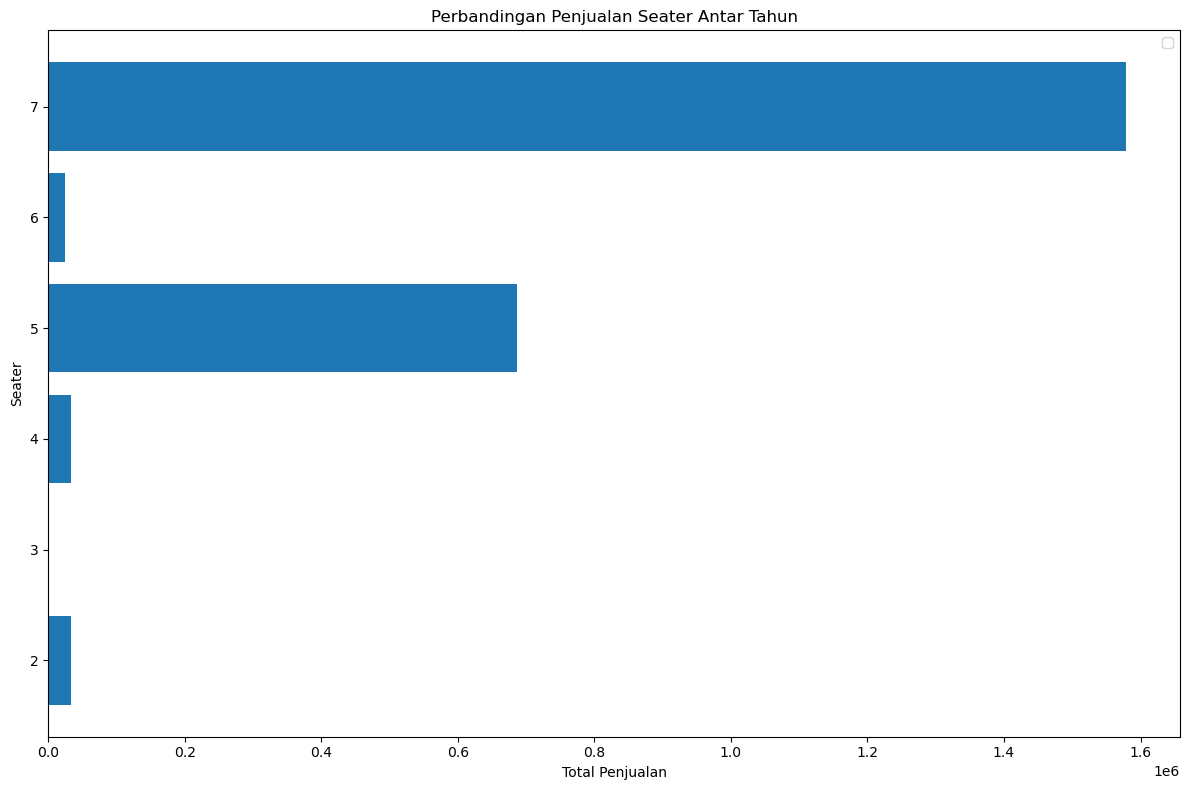

In [58]:
import matplotlib.pyplot as plt #membuat bar chart berdasarkan data peringkat jumlah tempat duduk yang terjual paling banyak.


plt.figure(figsize=(12, 8))

# Create a horizontal bar chart
plt.barh(sales_by_seater['Seater'], sales_by_seater['TOTAL'])

plt.title('Perbandingan Penjualan Seater Antar Tahun')
plt.xlabel('Total Penjualan')
plt.ylabel('Seater')  # Adjust label for horizontal bars
plt.legend()
plt.tight_layout()
plt.show()


Berdasarkan data tersebut, kita dapat mengetahui bahwa jumlah tempat duduk yang paling menjadi pilihan banyak orang adalah yang berjumlah 7 lalu diikuti oleh 5 dan terakhir adalah 4. hal tersebut terjadi karena biasanya mobil dengan jumlah tempat duduk 7 memiliki ruang yang lebih besar sehingga dapat memuat banyak orang ataupun barang dalam satu mobil sehingga penggunaan mobil dapat menjadi lebih efisien.

### Tipe Mesin dengan penjualan tertinggi

In [59]:
sales_by_engine = data.groupby('Engine Category ')['TOTAL'].sum().reset_index() #menentukan jumlah penjualan yang dikelompokan dengan tipe mesin.

# Urutkan berdasarkan total terjual secara descending
sales_by_engine = sales_by_engine.sort_values('TOTAL', ascending=False).head() #mengurutkan data dari jumlah penjualan tertinggi dan mengambil hanya 5 data

# Tampilkan beberapa brand teratas
print(sales_by_engine)

           Engine Category     TOTAL
5          CC < 1.500 [G/D]  1437025
6            CC ≤ 1.200 [G]   568729
2    CC 1.501 - 2.501 [G/D]   143097
0  CC 1.501 -   2.501 [G/D]   104075
1   CC 1.501 -  2.501 [G/D]   101881


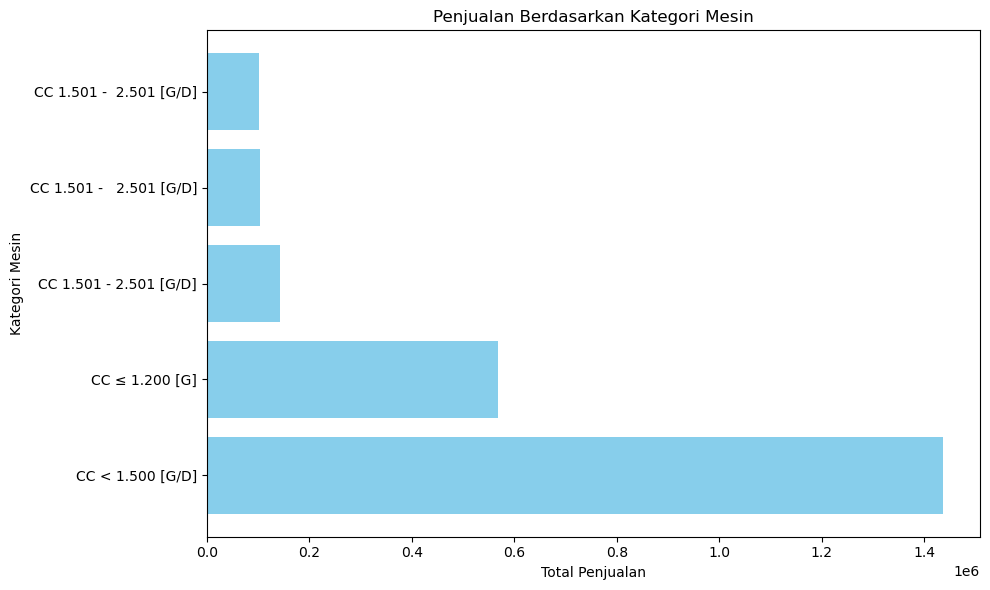

In [60]:
import matplotlib.pyplot as plt #membuat grafik bar horizontal untuk data urutan tipe mesin terlaris


# Membuat grafik batang horizontal
plt.figure(figsize=(10,6))
plt.barh(sales_by_engine['Engine Category '], sales_by_engine['TOTAL'], color='skyblue')
plt.title('Penjualan Berdasarkan Kategori Mesin')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Mesin')
plt.tight_layout()
plt.show()

Berdasarkan data diatas data diatas penjualan tertinggi adalah mobil berkapasitas dibawah 1500 (tepatnya), seperti xenia, avanza, ertiga, dan banyak lagi. karena mobil dengan kapasitas tersebut memiliki harga yang bersaing dan cukup irit bbm dan memiliki power yang cukup untuk melahap banyak bentuk jalanan di indonesia.

### Tipe Mobil dengan penjualan tertinggi

In [61]:
sales_by_Type = data.groupby(['Type Model','YEAR'])['TOTAL'].sum().reset_index() #mengambil data total penjualan mobil yang dikelompokan berdasarkan tipe model dan tahun. 
# Urutkan berdasarkan total terjual secara descending
sales_by_Type2024 = sales_by_Type[sales_by_Type['YEAR'] ==  2024].sort_values('TOTAL', ascending=False).head(3) #mengambil data untuk spesifik tahun tertentu dan mengambil top 3.
sales_by_Type2023 = sales_by_Type[sales_by_Type['YEAR'] ==  2023].sort_values('TOTAL', ascending=False).head(3)
sales_by_Type2022 = sales_by_Type[sales_by_Type['YEAR'] ==  2022].sort_values('TOTAL', ascending=False).head(3)
sales_by_Type2021 = sales_by_Type[sales_by_Type['YEAR'] ==  2021].sort_values('TOTAL', ascending=False).head(3)
combined_data_Type = pd.concat([sales_by_Type2024, sales_by_Type2023, sales_by_Type2022, sales_by_Type2021])
# Tampilkan beberapa brand teratas
print(sales_by_Type2024)

                    Type Model  YEAR  TOTAL
525              Brio SATYA  E  2024  21303
1392  New  Sigra 1.2 R MT 2022  2024  13088
620           Calya 1.2 G 2022  2024  10466


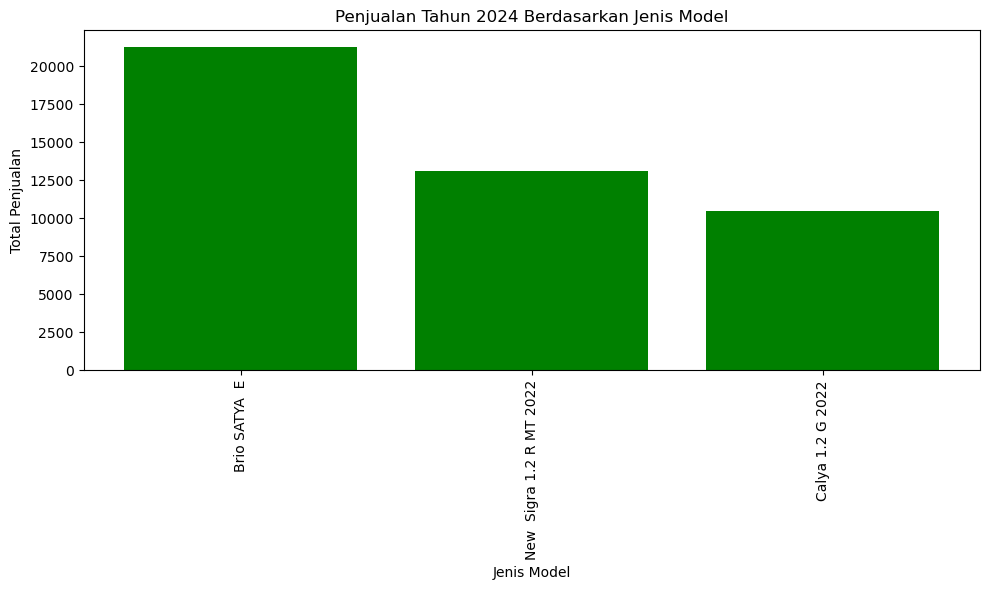

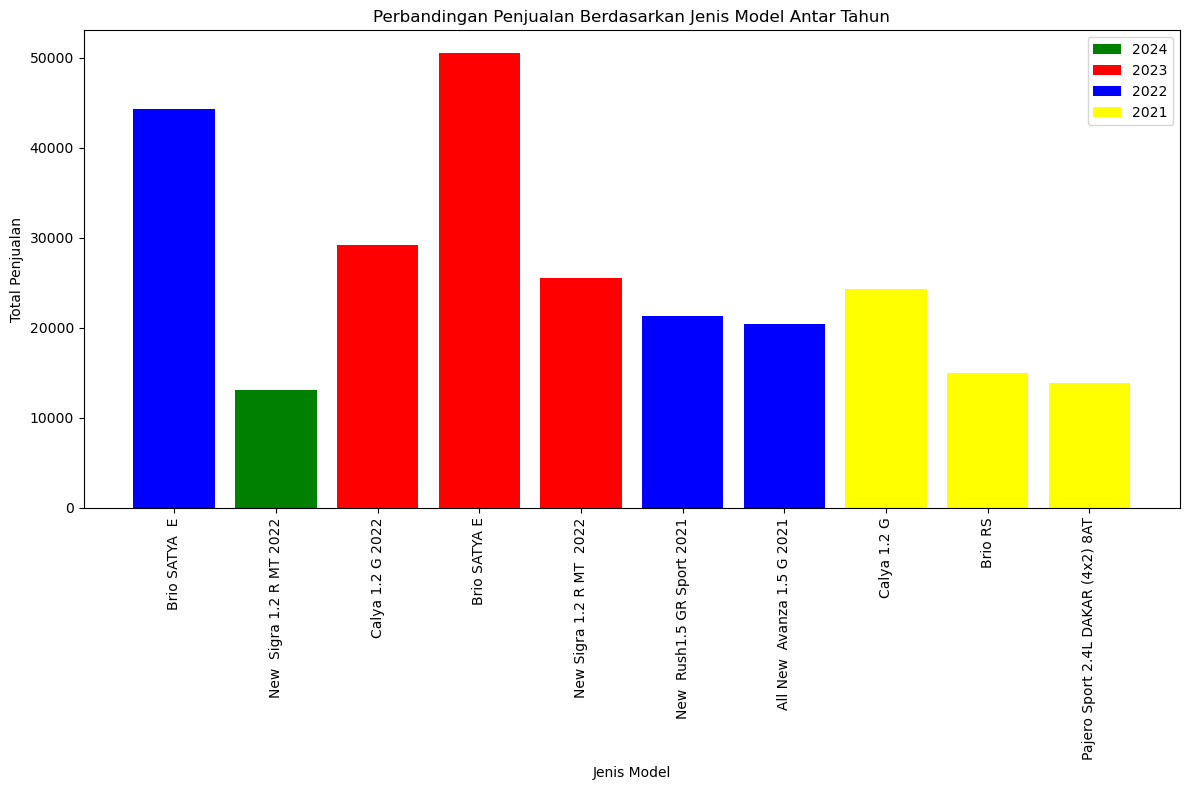

In [62]:
sales_by_Type = data.groupby(['Type Model','YEAR'])['TOTAL'].sum().reset_index()
# Urutkan berdasarkan total terjual secara descending
sales_by_Type2024 = sales_by_Type[sales_by_Type['YEAR'] ==  2024].sort_values('TOTAL', ascending=False).head(3)
sales_by_Type2023 = sales_by_Type[sales_by_Type['YEAR'] ==  2023].sort_values('TOTAL', ascending=False).head(3)
sales_by_Type2022 = sales_by_Type[sales_by_Type['YEAR'] ==  2022].sort_values('TOTAL', ascending=False).head(3)
sales_by_Type2021 = sales_by_Type[sales_by_Type['YEAR'] ==  2021].sort_values('TOTAL', ascending=False).head(3)
combined_data_Type = pd.concat([sales_by_Type2024, sales_by_Type2023, sales_by_Type2022, sales_by_Type2021])

# Membuat grafik batang untuk penjualan tahun 2024
plt.figure(figsize=(10,6))
plt.bar(sales_by_Type2024['Type Model'], sales_by_Type2024['TOTAL'], color='#008000')  # Ubah warna menjadi hijau tua
plt.title('Penjualan Tahun 2024 Berdasarkan Jenis Model')
plt.xlabel('Jenis Model')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)  # Untuk memutar label x-axis agar lebih mudah dibaca
plt.tight_layout()
plt.show()

# Membuat grafik batang untuk perbandingan penjualan antar tahun
plt.figure(figsize=(12,8))
colors = ['#008000', '#FF0000', '#0000FF', '#FFFF00']  # Daftar warna yang kontras
for i, tahun in enumerate(combined_data_Type['YEAR'].unique()):
    data_tahun = combined_data_Type[combined_data_Type['YEAR'] == tahun]
    plt.bar(data_tahun['Type Model'], data_tahun['TOTAL'], label=f'{tahun}', color=colors[i])
plt.title('Perbandingan Penjualan Berdasarkan Jenis Model Antar Tahun')
plt.xlabel('Jenis Model')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


Berdasarkan data diatas cukup membuktikan data data sebelumnya, karena 11 dari 12 data mobil dengan penjualan tertinggi adalah mobil dengan kapasitas kursi 7 orang, selain itu 10 dari 12 mobil diatas memiliki kapasitas mesin hingga 1500cc yang juga berhasil membuktikan kebenaran data sebelumnya.

## Ada atau tidaknya hubungan antara merek dengan jumlah penjualan

H0 = Tidak ada hubungan antara merek dengan penjualan.

H1 = Terdapat hubungan antara merek dengan penjualan.


In [63]:
#kode dibawah digunakan untuk melaukan encode pada kolom brand
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
total_no_outlier['brand_encoded'] = le.fit_transform(total_no_outlier['Brand'])

C:\Users\muham\AppData\Local\Temp\ipykernel_30568\710348651.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Karena tipe data kategorikal dan Numerikal, maka saya menggunakan kendal tau untuk melaukan uji korelasinya.

In [64]:
def corr(col): #kode kendaltau dan p-value
  tmp = total_no_outlier.groupby(col)[['brand_encoded']].mean().reset_index()
  tau, pval = stats.kendalltau(tmp[col],tmp['brand_encoded'])
  print('Kendall Tau:',tau)
  print('P-value:',pval)

corr('TOTAL') #melakukan uji korelasi pada data TOTAL

Kendall Tau: 0.08642801059016765
P-value: 0.0014010842534712415


Dengan critical value : 0.05, dengan P-Value 0.001 menunjukkan bukti yang sangat kuat yang menolak hipotesis nol.

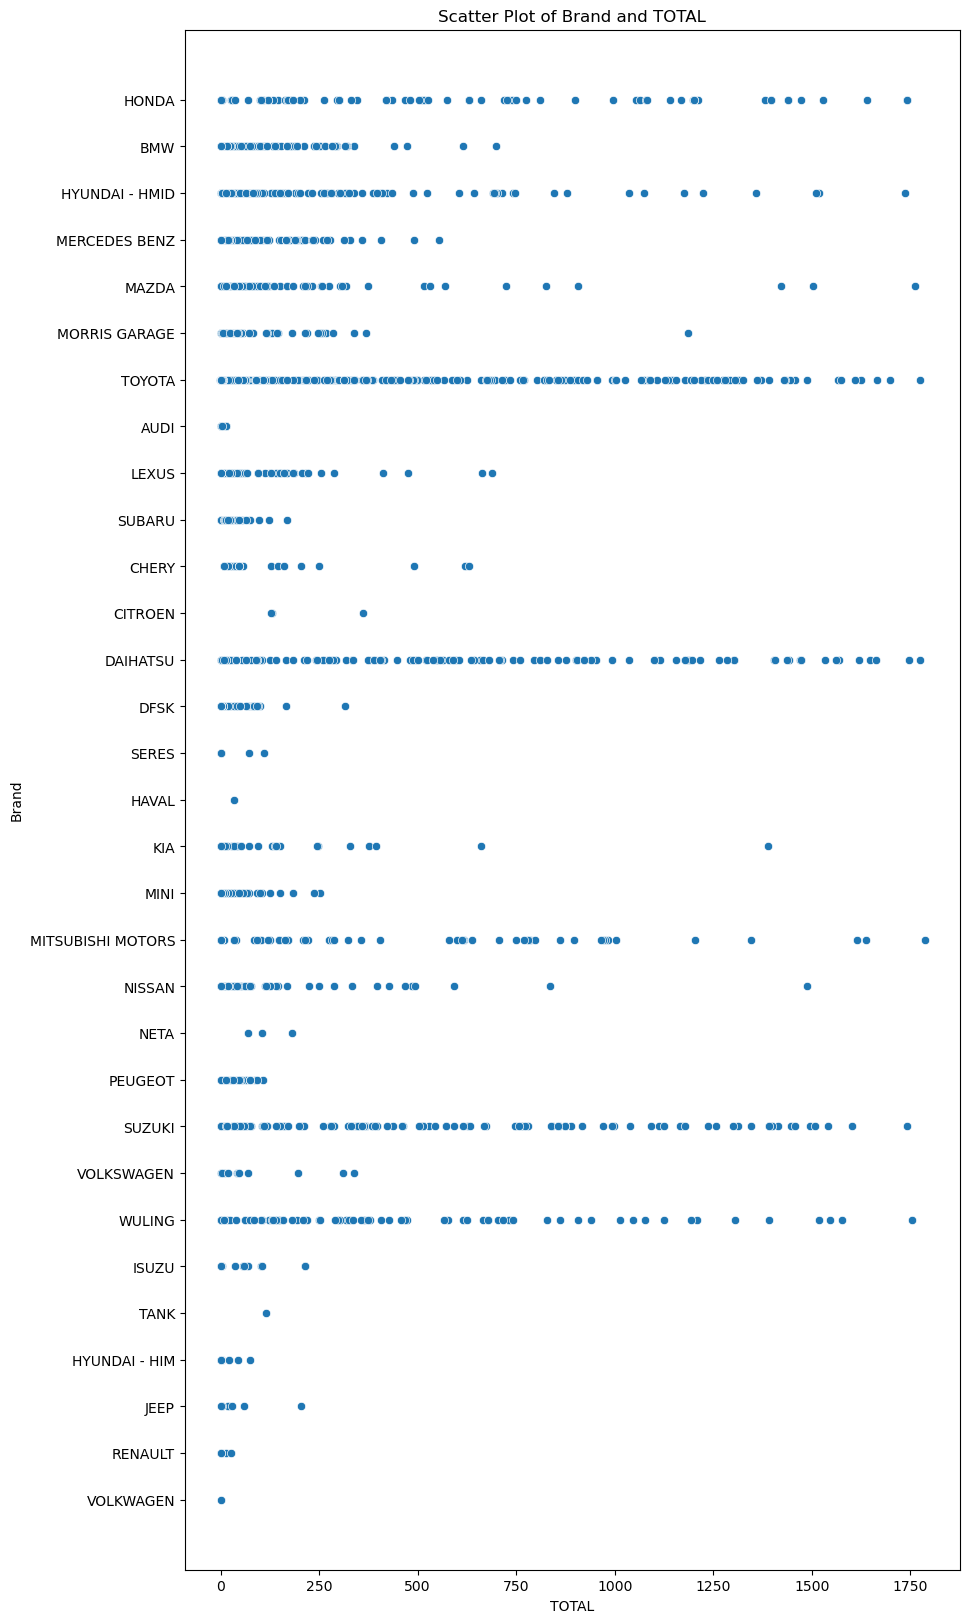

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))
sns.scatterplot(x='TOTAL', y='Brand', data=total_no_outlier)
plt.xlabel('TOTAL')
plt.ylabel('Brand')
plt.title('Scatter Plot of Brand and TOTAL')
plt.show()

Karena hipotesis 0 ditolak dengan kuat, kita dapat mengetahui bahwa merek mobil berpengaruh kepada jumlah penjualannya. hal tersebut dapat terjadi karena sebelum membeli mobil, biasanya pembeli memikirkan terlebih dahulu tentang mobil dan mereknya. terutama seperti mudah atau tidak servisnya, dimana tempat servisnya dan sebagainya. 

Untuk di indonesia khususnya, toyota dan daihatsu adalah pionir di penjualan karena orang indonesia sudah mempercayai produk dari kedua brand tersebut dan tempat service kedua brand tersebut ada tersebar diseluruh indonesia.

## Ada tidaknya hubungan antara transmisi dan total penjualan mobil.

H0 : Tidak ada perbedaan signifikan pada penjualan antara ketiga jenis transmisi.

H1 : Terdapat perbedaan Signifikan pada penjualan antara ketiga jenis tranmsisi.

In [66]:
CVT = total_no_outlier[(total_no_outlier['Transmission']=='CVT')]['TOTAL'] #mengambil data penjualan berdasarkan pada tipe transmisinya.
AT = total_no_outlier[(total_no_outlier['Transmission']=='AT')]['TOTAL']
MT = total_no_outlier[(total_no_outlier['Transmission']=='MT')]['TOTAL']

Karena data terdapat lebih dari 2, jadi saya menggunakan pengujian ANNOVA untuk menjawab hipotesis tersebut,

In [67]:
res = stats.f_oneway(CVT, AT, MT) #uji test annova
print('P-value:',res.pvalue)

P-value: 2.057012721974275e-19


In [68]:
print('Jumlah mobil automatic yang terjual', AT.sum())
print('Jumlah mobil CVT yang terjual', CVT.sum())
print('Jumlah mobil Manual yang terjual', MT.sum())

Jumlah mobil automatic yang terjual 274439
Jumlah mobil CVT yang terjual 70768
Jumlah mobil Manual yang terjual 135539


Karena P Value lebih kecil signifikan dari 0.05, maka kita menolak hipotesis 0.

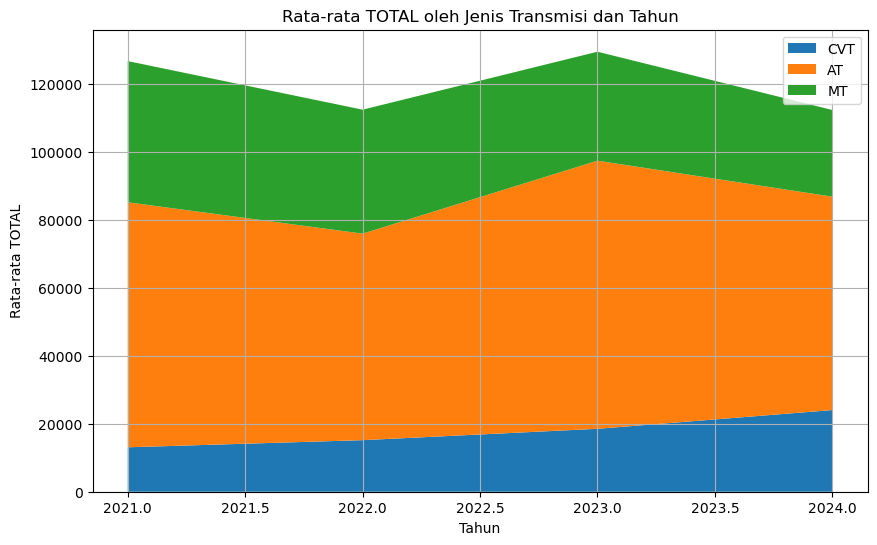

In [69]:
import matplotlib.pyplot as plt

CVT = total_no_outlier[(total_no_outlier['Transmission']=='CVT')]['TOTAL'].groupby(total_no_outlier['YEAR']).sum()
AT = total_no_outlier[(total_no_outlier['Transmission']=='AT')]['TOTAL'].groupby(total_no_outlier['YEAR']).sum()
MT = total_no_outlier[(total_no_outlier['Transmission']=='MT')]['TOTAL'].groupby(total_no_outlier['YEAR']).sum()

plt.figure(figsize=(10, 6))

# Stack the data series for the area plot
plt.stackplot(CVT.index, CVT.values, AT.values, MT.values, labels=['CVT', 'AT', 'MT'])

plt.xlabel('Tahun')
plt.ylabel('Rata-rata TOTAL')
plt.title('Rata-rata TOTAL oleh Jenis Transmisi dan Tahun')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
print('Penjualan transmisi CVT', total_no_outlier.loc[(data['Transmission']=='CVT') & (total_no_outlier['YEAR']==2024)]['TOTAL'].sum())
print('Penjualan transmisi AT',total_no_outlier.loc[(data['Transmission']=='AT') & (total_no_outlier['YEAR']==2024)]['TOTAL'].sum())
print('Penjualan transmisi MT:',total_no_outlier.loc[(data['Transmission']=='MT') & (total_no_outlier['YEAR']==2024)]['TOTAL'].sum())

Penjualan transmisi CVT 24021
Penjualan transmisi AT 62766
Penjualan transmisi MT: 25497


Berdasarkan informasi dan data diatas, kita dapat mengetahui terdapat perbedaan signifikan pada penjualan antara jenis transmisi. hal tersebut dapat terjadi karena orang belakangan ini lebih memilih mobil otomatis yang lebih mudah digunakan dan tidak perlu menginjak kopling seperti mobil manual, selain itu diantara mobil otomatis terdapat mobil CVT dan mobil AT. karena jumlah mobil AT yang lebih banyak pilihan dan dipercaya lebih kuat, kemungkinan itu menjadi alasan kenapa mobil AT memiliki penjualan tertinggi dibandingkan tipe transmisi lainnya.

# Pengambilan Kesimpulan


Kesimpulan yang dapat diambil dari analisis diatas adalah, spesifikasi mobil yang minati masyarakat indonesia umumnya memiliki beberapa kriteria, yaitu :
1. memiliki merek yang terkenal dalam membuat mobil yang tangguh dan irit, selain itu juga mudah dirawat dan memiliki banyak tempat service.
2. Memiliki daya angkut yang banyak sehingga mobil yang memiliki 7 kursi menjadi pilihan.
3. Memiliki mesin yang irit dan tangguh.
4. Memiliki transmisi AT yang tangguh dan mudah digunakan.
dengan menjual mobil dengan kriteria tersebut dapat meningkatkan penjualan dan mengurangi stok macet dari dalam gudang, karena kriteria sudah cukup sesuai dengan kriteria yang diminati kebanyakan masyarakat indonesia.